# AUTO-MPG PREDICTION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Importing Data

In [2]:
data = pd.read_csv(auto-mpg.data, delim_whitespace=True, names=header)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Checking and handling missing values

In [3]:
df = data.copy()
df.info() #'horsepower' type is object,  we need to check it.
df['horsepower'].unique() #There are '?' values in this column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model-year      398 non-null int64
origin          398 non-null int64
car-name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [4]:
df['horsepower'] = df['horsepower'].replace('?', np.nan) #Replace '?' with NaN so the values will detect as null or missing value
df['horsepower'].isnull().sum()

6

In [5]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].dropna().astype(float).mean()).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model-year      398 non-null int64
origin          398 non-null int64
car-name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


Drop column that we are not going to use

In [6]:
df = df.drop(columns = 'car-name')
df.head()
#We don't predict MPG based car-name

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Exploring Data

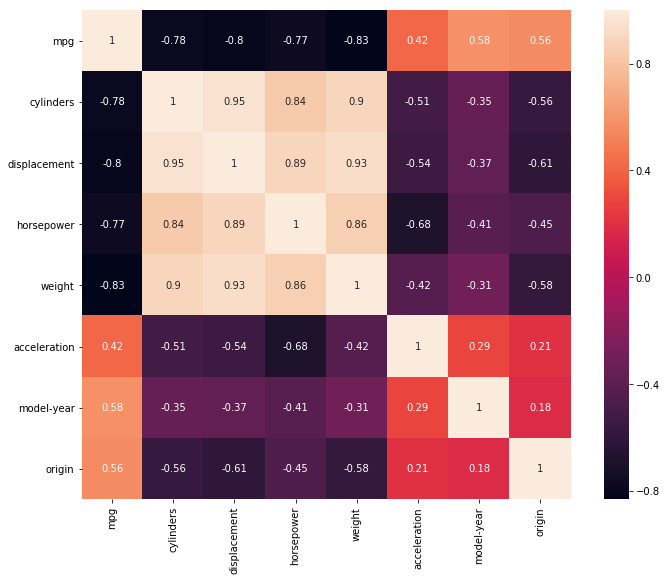

In [7]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True);

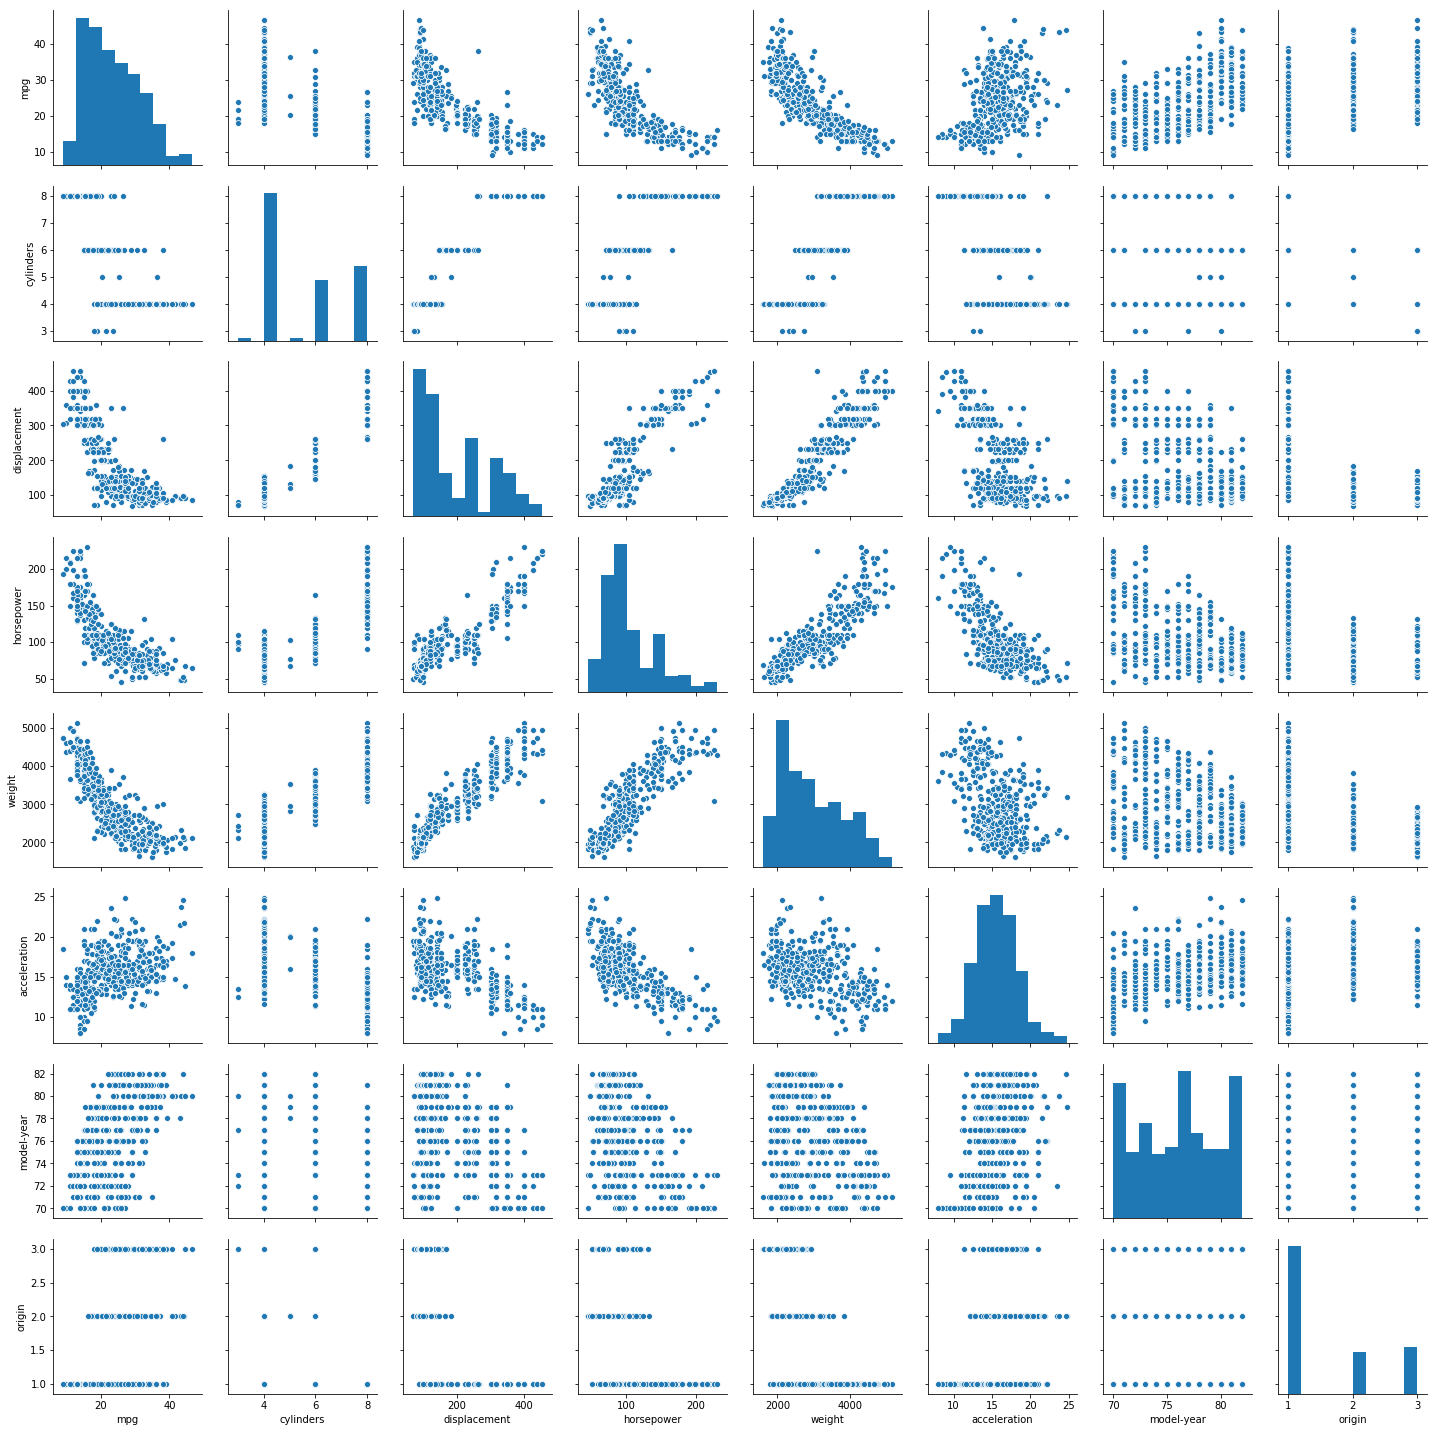

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
#from exploration data, we found that cylinders, displacement, horsepower, and weight have strong negative correlation with MPG

Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
#splitting train and test data

X = df[['cylinders','displacement', 'horsepower','weight']]
y = df['mpg']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
#fitting into LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test, y_pred)

0.683561414185194

In [15]:
poly = PolynomialFeatures(degree=2)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)
pr = LinearRegression()

# Fit
pr.fit(X_train_, y_train)

# Predict
y_pred_=pr.predict(X_test_)

r2_score(y_test, y_pred_)

0.7635569868533403